 ## Asset Pricing and Sensitivity Analysis Using the Black-Scholes Model and Greeks

The Black-Scholes model is a widely used mathematical model for pricing European call and put options. It assumes that the price of the underlying asset follows a geometric Brownian motion, with constant volatility and a risk-free interest rate. The model provides a closed-form solution to calculate the theoretical price of options, based on the following inputs:

- Current stock price \(S\)
- Strike price \(X\)
- Risk-free interest rate \(r\)
- Time to expiration \(T\)
- Volatility of the underlying asset \(\sigma\)
- Cumulative distribution function of a standard normal distribution $N(d_1)$ and $N(d_2)$  
- Probability density function of the standard normal distribution $N'(d_1)$


The Black-Scholes formula for **call** and **put** option prices are:

$$
C = S N(d_1) - X e^{-rT} N(d_2), \quad P = X e^{-rT} N(-d_2) - S N(-d_1)
$$

Where:

$$
d_1 = \frac{\ln(S/X) + (r + \sigma^2 / 2)T}{\sigma \sqrt{T}}, \quad d_2 = d_1 - \sigma \sqrt{T}
$$

The model helps traders and analysts estimate the fair price of options, aiding in decision-making and risk management.




### Risk Sensitivities - The Greeks

The Greeks are key risk measures that describe how sensitive an option's price is to various factors like the underlying asset's price, volatility, interest rate, and time. They help traders manage risk by showing how different changes affect the value of an option. Below are the main Greeks, along with their simple formulas:

#### Delta
Delta measures how much the option price changes for every $1 move in the underlying asset. It’s the first derivative of the option price with respect to the underlying asset price.

  $$
  \Delta_{\text{call}} = N(d_1) \quad \text{and} \quad \Delta_{\text{put}} = N(d_1) - 1
  $$

#### Gamma

Gamma measures how much Delta changes as the underlying asset price moves. It helps assess how stable Delta is for small changes in the underlying price.

$$
\Gamma = \frac{N'(d_1)}{S \sigma \sqrt{T}} \quad \text{(same for both call and put options)}
$$

#### Theta
Theta measures how much the option price decays with time, also known as time decay. It shows the rate of change of the option price with respect to time.

  $$
  \Theta_{\text{call}} = -\frac{S N'(d_1) \sigma}{2 \sqrt{T}} - r X e^{-rT} N(d_2) \quad \text{and} \quad \Theta_{\text{put}} = -\frac{S N'(d_1) \sigma}{2 \sqrt{T}} + r X e^{-rT} N(-d_2)
  $$

#### Vega
Vega measures how much the option price changes with a 1% change in the underlying asset’s volatility. It shows the sensitivity to changes in market volatility.

$$
\nu = S N'(d_1) \sqrt{T} \quad \text{(same for both call and put options)}
$$

#### Rho
Rho measures how much the option price changes when the risk-free interest rate changes by 1%. It’s important for understanding how interest rates affect option prices.

  $$
  \rho_{\text{call}} = X T e^{-rT} N(d_2) \quad \text{and} \quad \rho_{\text{put}} = -X T e^{-rT} N(-d_2)
  $$


These simple measures help traders understand how an option’s price will react to changes in the market, making them essential for risk management in options trading.

### Exploratory Data Analysis
Consider an investor who would like to invest in BASF. BASF Data was obtained from yahoo finance with the ticker 'BAS.DE' 

In [1]:
#import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
import seaborn as sns
sns.set()

import yfinance as yf
import datetime
import numpy as np
import pandas as pd

from pandas_datareader import data as wb
from scipy.stats import norm
from tabulate import tabulate
from colorama import Fore, Back, Style

# set plotting parameters
%matplotlib inline
#sns.set_style("whitegrid")
plt.rc("figure", figsize=(12, 8))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

#### The Data
- The data extrated is a time series data for every trading day. 

-  We download historical market data from yahoo finance for BASF (BAS.DE). The dataset consists of daily market data such as open, high, low and close prices ranging from 2017-01-01 to 2021-12-31.

- The BASF market data obtained from yahoo finance is made up of 1267 rows and 6 columns. All columns have 255 non-null values (no missing value).

- The adjusted closing price for the first few years is smaller compared to the closing price as in the table above. The difference is due to dividends paid to stock owners as well as other changes in stock price such as stock splits, increase in capital etc. 

- The date column only include trading days. That is to say that, the date column excludes Saturdays, Sundays and National Holidays as stock markets are not opened on such days.  

- It is worth nothing that, the first two rows (Table descriction) are not counted as part of the rows with data. The first row is the row with data with a date of "2017-01-02". Row one is the next row and so on.

In [2]:
#BASF_data = wb.DataReader('BAS.DE', data_source = 'yahoo', start = '2017-01-01', end = '2021-12-31')
#BASF_data


ticker = "BAS.DE"
start = '2017-01-01'
end = '2021-12-31'

# Download the historical stock prices
BASF_data = yf.download(ticker, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
#General inforamtion about the data : This includes the row index, column names and the number of non-zero values.

BASF_data.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2017-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1267 non-null   float64
 1   High       1267 non-null   float64
 2   Low        1267 non-null   float64
 3   Close      1267 non-null   float64
 4   Adj Close  1267 non-null   float64
 5   Volume     1267 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 69.3 KB


- Now we extract the column needed for estimating the Call and Put option prices. This is the Adjusted Closing Price.


- The stock's closing price is modified by the adjusted closing price to reflect the stock's worth following any corporate actions such as dividends paid to stock owners and other changes such to stock price such as stock splits etc. 


- When analyzing historical returns or performing a thorough analysis of past performance, it is frequently used.

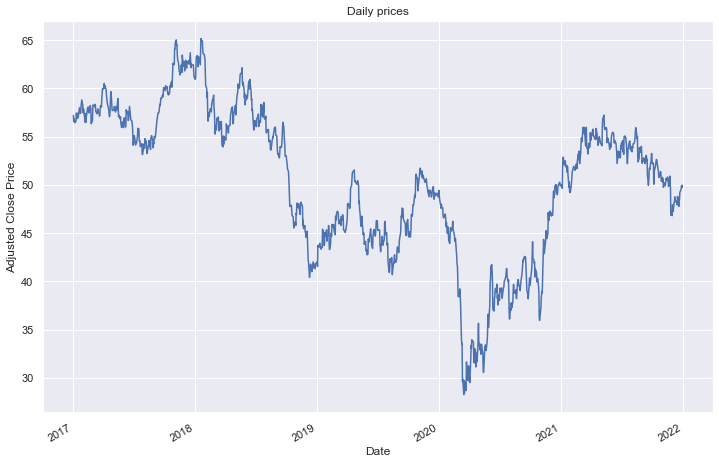

In [4]:
BASF = BASF_data['Adj Close']
BASF.head()

BASF.plot()
plt.title('Daily prices')
plt.ylabel('Adjusted Close Price')
plt.show()

#ticker = 'BAS.DE'  
#BASF = pd.DataFrame()  
#BASF[ticker] = wb.DataReader(ticker, data_source='yahoo', start = '2021-01-01', end = '2021-12-31')['Adj Close']
#BASF

###### Log Returns
- Log returns : Instead of simple rates of return, we could use logarithmic rates of return, also called log returns. 
- We calculate the daily returns of the BASF Stock. The log returns formula is given by:
$$
ln(\frac{P_t}{P_{t-1}})
$$
-As we can see from the graph below, our time series has a stable trend and now they are moving around zero. The sharpe of the distribution is clearly seen in the second graph. This further implies that our log return's data is normally distributed and have a stable mean. We can conclude then that, our time series are now closer to stationarity and we can use them for our analysis.

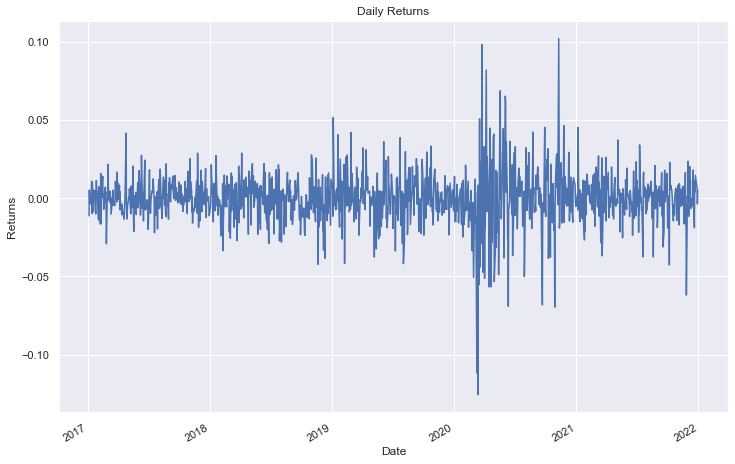

Text(8.120000000000005, 0.5, 'Frequency')

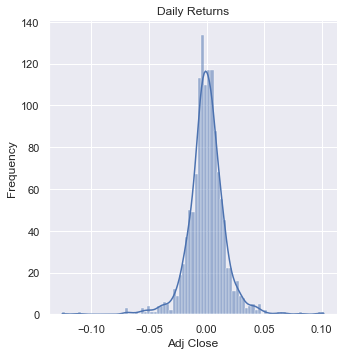

In [5]:
log_returns = np.log(1 + BASF.pct_change()) 

log_returns.plot()
plt.title("Daily Returns")
plt.ylabel("Returns")
plt.show()

sns.displot(log_returns, kde=True)
plt.title("Daily Returns")
plt.ylabel("Frequency")

### Call and Put Option Pricing

- We define the following functions for d1,d2, call price and put price. For coding seek let $S_0=S$
-  we then create a variable S, which is equal to the last adjusted closing price of BASF. We use the “iloc” method. This method will deliver the current stock price.

In [6]:
def d1(S, X, r, stdev, T):
    return (np.log(S / X) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, X, r, stdev, T):
    return (np.log(S / X) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM_call(S, X, r, stdev, T):
        return (S * norm.cdf(d1(S, X, r, stdev, T))) - (X * np.exp(-r * T) * norm.cdf(d2(S, X, r, stdev, T)))
    
def BSM_put(S, X, r, stdev, T):
        return ((X * np.exp(-r * T) * norm.cdf(-d2(S, X, r, stdev, T))) - S * norm.cdf(-d1(S, X, r, stdev, T)))

In [7]:
#current stock price

S = BASF.iloc[-1]      
S

49.96228790283203

### Standard Deviation
- Another argument we could extract from the data is the standard deviation (volatility). In our case, we will use an approximation of the standard deviation of the logarithmic returns of this stock.


- We store the annual standard deviation of the log returns in a variable called “stdev”.

In [8]:
stdev = log_returns.std() * 250 ** 0.5           
stdev   

0.2583210036440641

- Set the risk free rate $r$, equal to 2.5% (0.025); the strike price $X$, equal to 48.0; and the time horizon $T$ equal to 1, respectively.

In [9]:
r = 0.025
X = 48
T = 1

### Estimate the $d1$ and $d2$ functions with the relevant arguments to obtain their values.

In [10]:
d1(S, X, r, stdev, T)

0.3810465934500704

In [11]:
d2(S, X, r, stdev, T)

0.12272558980600634

### Call and Put Prices 

Use the BSM function to estimate the price of a call option, given you know the values of S, K, r, stdev, and T.
We can calculate the price of the call option. We will stick to a risk free rate of 2.494% (approxiamtely 2.5%) corresponding to a 10 year German government bond.  

In [12]:
call_price = BSM_call(S, X, r, stdev, T)
print("Call Price: ", str(call_price))

Call Price:  6.702556557352299


In [13]:
put_price = BSM_put(S, X, r, stdev, T)
print("Put price: ", str(put_price))

Put price:  3.555144431880233


#### Explanation of Results

The call and put option prices for the BASF stock are 12.40 and 1.60 respectively.

- NB: It is possible for the price of an option (Call and Put) to be much lower than the actual stock price. This is because the value of the option depends on multiple parameters, such as strike price, time to maturity and volatility. And it is not directly proportional to the price of the security.

### Sensitivity Measures -- The Greeks

In [20]:
# Calculate Greeks
def calculate_greeks(S, X, r, stdev, T):
    d1_value = d1(S, X, r, stdev, T)
    d2_value = d2(S, X, r, stdev, T)

    # Delta
    delta_call = norm.cdf(d1_value)
    delta_put = delta_call - 1

    # Gamma
    gamma = norm.pdf(d1_value) / (S * stdev * np.sqrt(T))

    # Theta
    theta_call = (-S * norm.pdf(d1_value) * stdev / (2 * np.sqrt(T)) 
                  - r * X * np.exp(-r * T) * norm.cdf(d2_value))
    theta_put = (-S * norm.pdf(d1_value) * stdev / (2 * np.sqrt(T)) 
                 + r * X * np.exp(-r * T) * norm.cdf(-d2_value))

    # Vega
    vega_call = S * norm.pdf(d1_value) * np.sqrt(T)
    vega_put = vega_call  # Vega is the same for both call and put options

    # Rho
    rho_call = X * T * np.exp(-r * T) * norm.cdf(d2_value)
    rho_put = -X * T * np.exp(-r * T) * norm.cdf(-d2_value)

    return {
        'Delta Call': delta_call,
        'Delta Put': delta_put,
        'Gamma': gamma,
        'Theta Call': theta_call,
        'Theta Put': theta_put,
        'Vega Call': vega_call,
        'Vega Put': vega_put,
        'Rho Call': rho_call,
        'Rho Put': rho_put
    }

In [21]:
# Calculate Greeks
greeks = calculate_greeks(S, X, r, stdev, T)
# Create DataFrame for Greeks
greeks_df = pd.DataFrame({
    'Greeks': ['Delta', 'Gamma', 'Theta', 'Vega', 'Rho'],
    'Call': [greeks['Delta Call'], greeks['Gamma'], greeks['Theta Call'], greeks['Vega Call'], greeks['Rho Call']],
    'Put': [greeks['Delta Put'], greeks['Gamma'], greeks['Theta Put'], greeks['Vega Put'], greeks['Rho Put']]
})

# Display the DataFrame without the row index, like a Pandas DataFrame
greeks_df.style.hide(axis='index')

Greeks,Call,Put
Delta,0.648416,-0.351584
Gamma,0.028746,0.028746
Theta,-3.036504,-1.866132
Vega,18.536313,18.536313
Rho,25.693773,-21.121102


#### Interpretation of Greek Results

1. Delta: 
   - Call (0.8241): For every 1 dollar increase in the stock price, the call option's price is expected to rise by 0.8241   dollars,indicating strong positive sensitivity to price increases.
   - Put (-0.1759): Conversely, the put option's price will decrease by 0.1759 dollars with a 1 dollar increase in the stock price, reflecting weaker sensitivity to price changes.

2. Gamma (0.0173): This value indicates that as the underlying asset's price increases, the delta of both options 
   will also increase. This suggests that both options will become more sensitive to further price changes, 
   which is beneficial in volatile markets.

3. Theta:
   - Call (-2.8052): The call option loses approximately 2.80 dollars in value per day due to time decay, which is significant 
     as expiration approaches.
   - Put (-1.6348): The put option experiences a smaller loss of about 1.63 dollars per day, indicating that it retains value 
     better over time compared to the call.

4. Vega (14.8978): Both options exhibit a high sensitivity to changes in implied volatility. For every 1% increase in 
   volatility, the price of each option is expected to increase by about 14.90 dollars. This highlights the importance of 
   volatility in options pricing.

5. Rho:
   - Call (35.0798): A 1% increase in interest rates will raise the call option's price by approximately 35.08 dollars, 
     indicating a strong positive relationship with interest rates.
   - Put (-11.7351): In contrast, the put option's price will decrease by about 11.74 dollars with a 1% rise in interest rates, 
     showing its sensitivity to rate increases.

#### Summary: 
These Greeks provide crucial insights into the risks associated with the options. Delta and gamma indicate how the 
options respond to price changes, while theta reveals the impact of time decay. Vega highlights sensitivity to 
volatility, and rho shows how interest rates affect option pricing. Understanding these metrics is vital for effective 
options trading and risk management strategies.